In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import normalize
import matplotlib.cm as cm
import matplotlib.patches as patches
import matplotlib.colors as colors
from IPython.display import display, HTML
import matplotlib.image as mpimg
from skimage import data, io, filters,measure
from scipy.ndimage.interpolation import shift
import math
from sklearn.metrics import mean_squared_error
from scipy import ndimage
import cv2
from PIL import Image

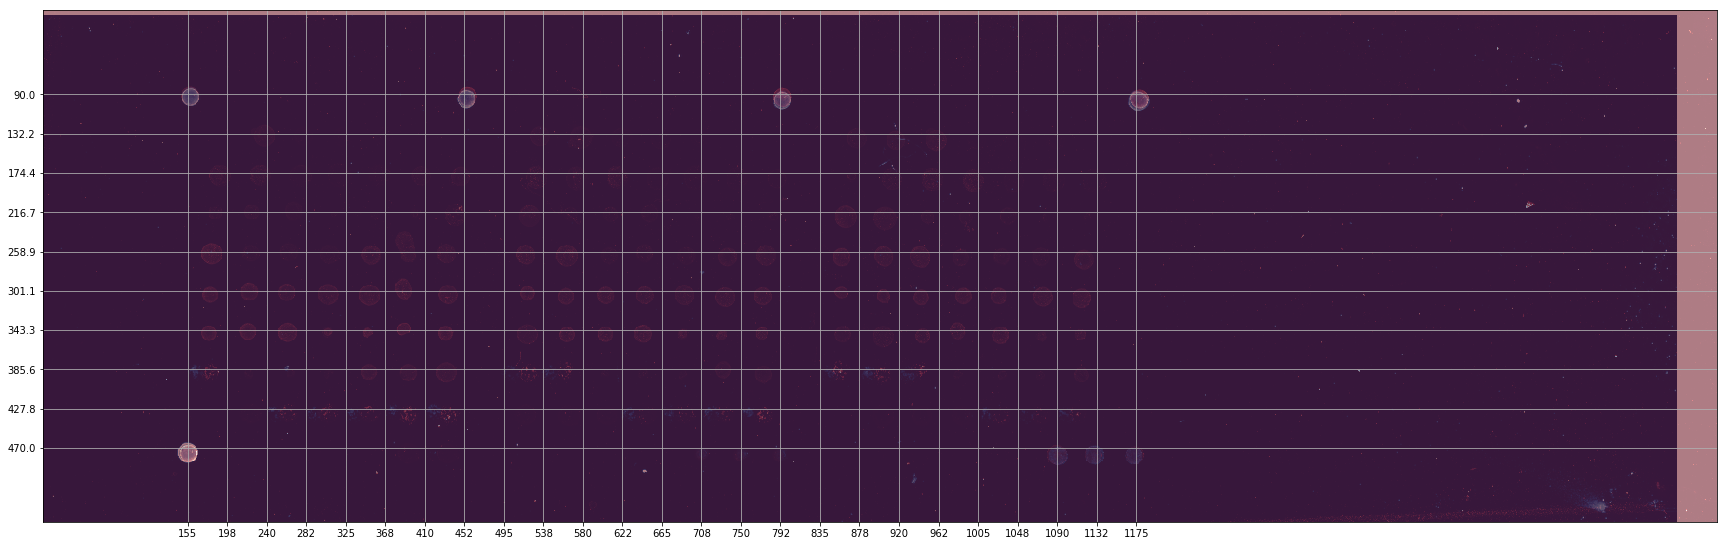

In [176]:
img=mpimg.imread('/media/janekg89/E950-DF37/170524_Spotting/170509_Spotting/170512_Again/2017-05-12_E5_600_100_532.tif')

img3=mpimg.imread('/media/janekg89/E950-DF37/170524_Spotting/170509_Spotting/170512_Again/2017-05-12_N12_600_100_635.tif')
img3after=mpimg.imread('/media/janekg89/E950-DF37/170524_Spotting/170509_Spotting/170512_Again/170519_after_Virus/2017-05-19_E6_untenliegend_X31_600_100_635.tif')

#img=np.invert(img)
#img2=np.invert(img2)
fig, ax = plt.subplots(figsize=(30,10))

imgplot = plt.imshow(-img3after.T,cmap='Reds')
#imgplot = plt.imshow(img2)

#ax.set_xticks(np.linspace(155,1175,25))
#ax.set_yticks(np.linspace(90,470,10))
#ax.set_xlim(x.min()-0.5, x.max()+0.5)
#ax.set_ylim(y.max()+0.5, y.min()-0.5)


#fig, ax = plt.subplots(figsize=(30,10))
imgplot = plt.imshow(shift(-img3.T,shift=[+4.8,-42.2]),cmap='Blues',alpha=0.5)
#imgplot = plt.imshow(img2)
ax.set_xticks(np.linspace(155,1175,25))
ax.set_yticks(np.linspace(90,470,10))
#ax.set_xlim(x.min()-0.5, x.max()+0.5)
#ax.set_ylim(y.max()+0.5, y.min()-0.5)
ax.grid()
plt.show()

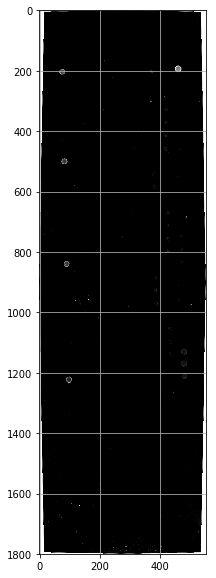

In [184]:
fig, ax = plt.subplots(figsize=(30,10))

img3 = ndimage.rotate(img3.T,-1,reshape=False)
plt.imshow(img3,cmap='Greys')
#imgplot = plt.imshow(img2)
#ax.set_xticks(np.linspace(155,1175,25))
#ax.set_yticks(np.linspace(90,470,10))
ax.grid()
plt.show()

In [2]:
def get_gradient(im) :
    # Calculate the x and y gradients using Sobel operator
    grad_x = cv2.Sobel(im,cv2.CV_32F,1,0,ksize=3)
    grad_y = cv2.Sobel(im,cv2.CV_32F,0,1,ksize=3)
 
    # Combine the two gradients
    grad = cv2.addWeighted(np.absolute(grad_x), 0.5, np.absolute(grad_y), 0.5, 0)
    return grad

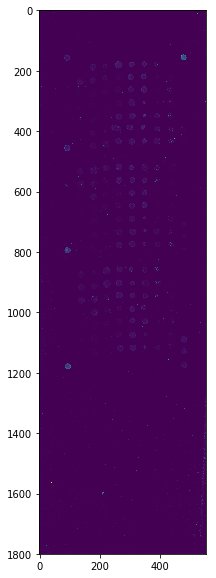

(7200, 2200)


TypeError: Image data can not convert to float

In [79]:
im =  cv2.imread('/media/janekg89/E950-DF37/170524_Spotting/170509_Spotting/170509_N10_600_100_635.tif', cv2.IMREAD_GRAYSCALE)
imafter =  cv2.imread('/media/janekg89/E950-DF37/170524_Spotting/170509_Spotting/170512_Again/170519_after_Virus/2017-05-19_N10_Pan_600_100_635.tif', cv2.IMREAD_GRAYSCALE)

im_grad=get_gradient(im)
im_grad_after=get_gradient(imafter)

fig, ax = plt.subplots(figsize=(30,10))

plt.imshow(imafter)
plt.show()
fig, ax = plt.subplots(figsize=(30,10))


sz = im.shape
print(sz)
height = int(sz[0] );
width = sz[1]
plt.imshow(imafter)
plt.show()
#fig, ax = plt.subplots(figsize=(30,10))

#plt.imshow(-imafter.T-shift(im.T,shift=[+4.8,-42.2]))
#plt.show()
'''
min_value,x_min,y_min,d_min= math.inf,0.0,0.0,0.0
for x in np.linspace(-1,+1,5):
    for y in np.linspace(-1,1,5):
        for d in np.linspace(-0.5,0.5,5):
            rotated = ndimage.rotate(im_grad.T,d,reshape=False)
            shifted=shift(rotated,shift=[+4.8+x,-42.2+y])
            #mse=measure.compare_nrmse(shifted[20:500,120:1220],p2[20:500,120:1220])
            mse=(-shifted[20:500,120:1220]+im_grad_after.T[20:500,120:1220]).sum()
            if mse < min_value:
                min_value = mse
                x_min = x
                y_min = y
                d_min = d
            print(min_value)


'''
'''
fig, ax = plt.subplots(figsize=(30,10))

plt.imshow(-imafter.T)
plt.show()
fig, ax = plt.subplots(figsize=(30,10))


sz = im.shape
print(sz)
height = int(sz[0] );
width = sz[1]
plt.imshow(-im.T)
plt.show()

im_aligned = np.zeros((height,width,3), dtype=np.uint8 )
im_aligned[:,:,2] = im

warp_mode = cv2.MOTION_HOMOGRAPHY

# Set the warp matrix to identity.
if warp_mode == cv2.MOTION_HOMOGRAPHY :
            warp_matrix = np.eye(3, 3, dtype=np.float32)
else :
            warp_matrix = np.eye(2, 3, dtype=np.float32)
# Set the stopping criteria for the algorithm.
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 5000,  1e-10)
(cc, warp_matrix) = cv2.findTransformECC (get_gradient(imafter), get_gradient(im),warp_matrix, warp_mode, criteria)
if warp_mode == cv2.MOTION_HOMOGRAPHY :
    # Use Perspective warp when the transformation is a Homography
    im_aligned[:,:,1] = cv2.warpPerspective (im, warp_matrix, (width,height), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
else :
    # Use Affine warp when the transformation is not a Homography
    im_aligned[:,:,1] = cv2.warpAffine(im, warp_matrix, (width, height), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
print (warp_matrix)

'''

0.5 -1.0 1.0


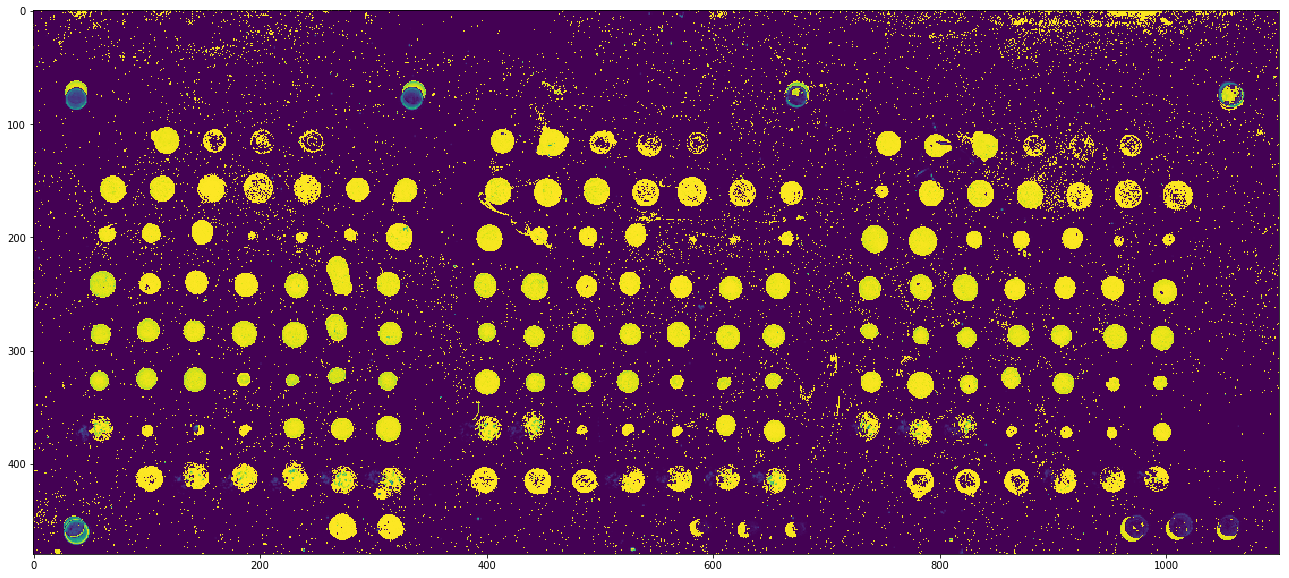

In [62]:
print(d_min,x_min,y_min)
rotated = ndimage.rotate(im.T,d_min,reshape=False)
shifted=shift(rotated,shift=[+4.8+x_min,-42.2+y_min])
fig, ax = plt.subplots(figsize=(30,10))

plt.imshow(+shifted[20:500,120:1220]-imafter.T[20:500,120:1220])
plt.show()

In [63]:
min_value,x_min,y_min,d_min= math.inf,0.0,0.0,0.0
p1=img3.T
p2=img3after.T
for x in np.linspace(-1,+1,5):
    for y in np.linspace(-1,1,5):
        for d in np.linspace(-0.5,0.5,5):
            rotated = ndimage.rotate(p1,d,reshape=False)
            shifted=shift(rotated,shift=[+4.8+x,-42.2+y])
            #mse=measure.compare_nrmse(shifted[20:500,120:1220],p2[20:500,120:1220])
            mse=(-shifted[20:500,120:1220]+p2[20:500,120:1220]).sum()
            if mse < min_value:
                min_value = mse
                x_min = x
                y_min = y
                d_min = d
            print(min_value)
            
        #print("the minimal value",min_value)

NameError: name 'img3' is not defined

-0.5 0.0 0.0


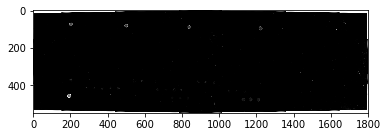

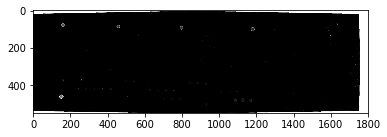

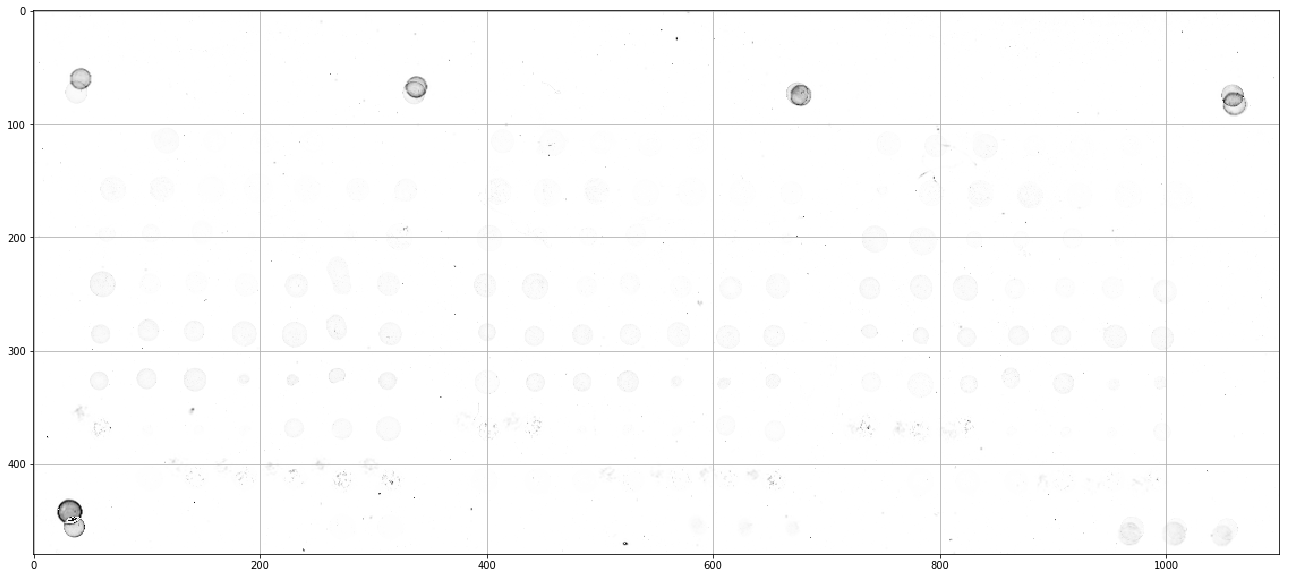

In [221]:
print(x_min,y_min,d_min)
rotated = ndimage.rotate(p1,d_min,reshape=False)
plt.imshow(rotated,cmap='Greys')
#imgplot = plt.imshow(img2)
#ax.set_xticks(np.linspace(155,1175,25))
#ax.set_yticks(np.linspace(90,470,10))
ax.grid()
plt.show()
shifted=shift(rotated,shift=[+4.8+x_min,-42.2+y_min])

plt.imshow(shifted,cmap='Greys')
#imgplot = plt.imshow(img2)
#ax.set_xticks(np.linspace(155,1175,25))
#ax.set_yticks(np.linspace(90,470,10))
ax.grid()
plt.show()

img_diff=shifted[20:500,120:1220]
fig, ax = plt.subplots(figsize=(30,10))

plt.imshow(-img_diff+p2[20:500,120:1220],cmap='Greys')
#imgplot = plt.imshow(img2)
#ax.set_xticks(np.linspace(155,1175,25))
#ax.set_yticks(np.linspace(90,470,10))
ax.grid()
plt.show()

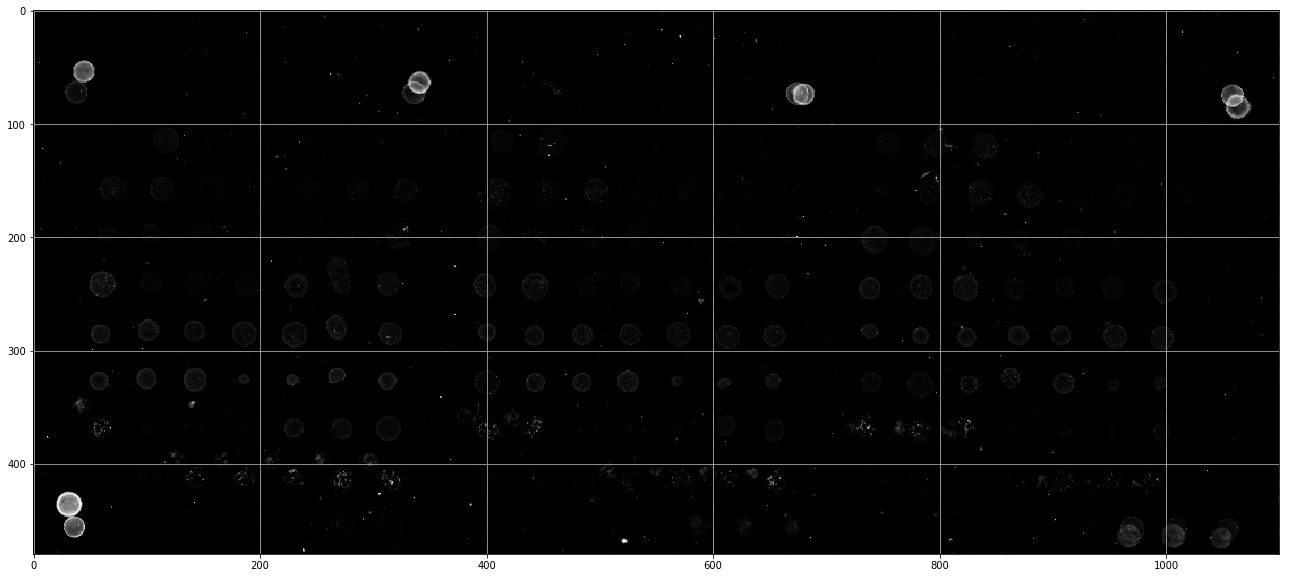

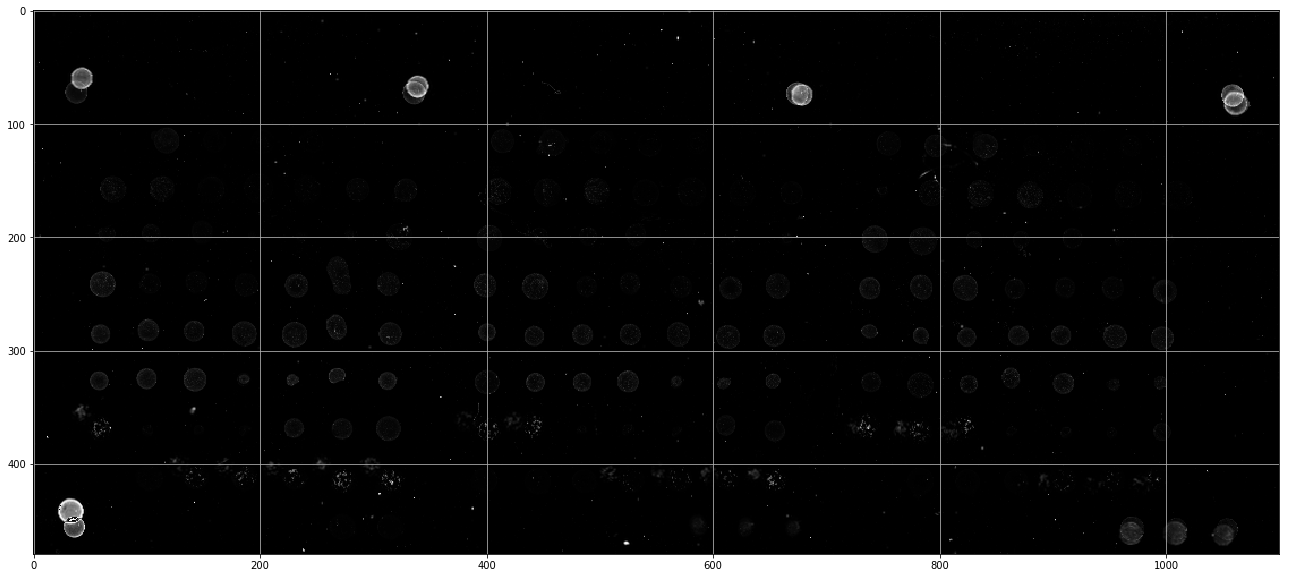

In [202]:
rotated = ndimage.rotate(p1,d_min,reshape=False)
shifted=shift(rotated,shift=[+4.8+x_min,-42.2+y_min])
img_diff=shifted[20:500,120:1220]-p2[20:500,120:1220]

fig, ax = plt.subplots(figsize=(30,10))
imgplot = plt.imshow(img_diff,cmap='Greys')
#ax.set_xticks(np.linspace(155,1175,25))
#ax.set_yticks(np.linspace(90,470,10))
ax.grid()
plt.show()
fig, ax = plt.subplots(figsize=(30,10))

img_diff=shift(p1,shift=[+4.8+x_min,-42.2+y_min])[20:500,120:1220]-p2[20:500,120:1220]
imgplot = plt.imshow(img_diff,cmap='Greys')

ax.grid()
plt.show()

/usr/local/lib/python3.5/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


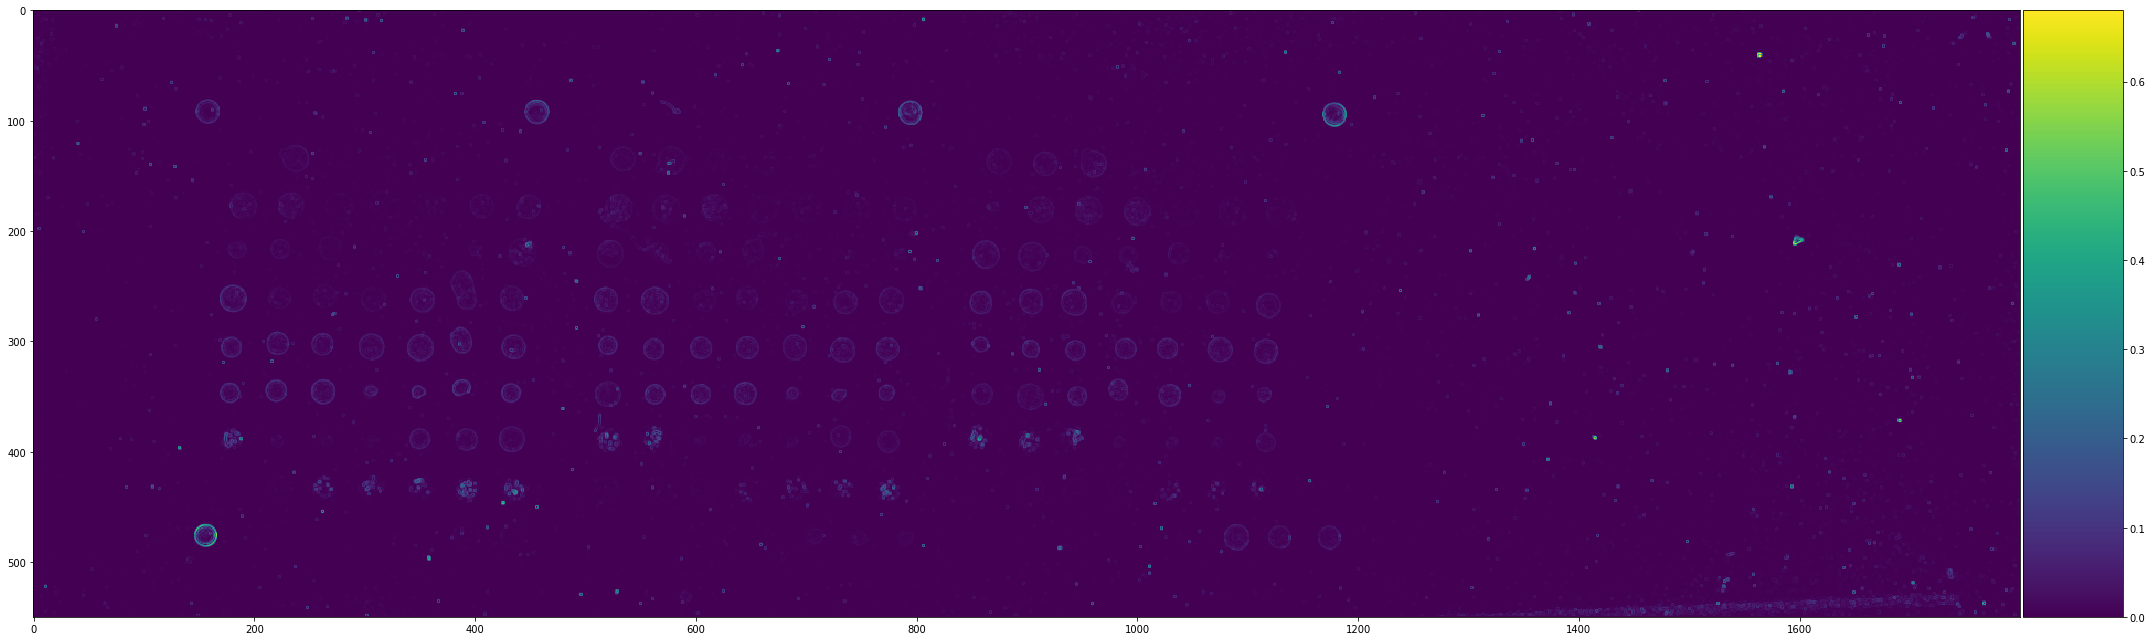

In [23]:
fig, ax = plt.subplots(figsize=(30,10))

edges= filters.sobel(img.T)
io.imshow(edges)
io.show()